In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import plotly.express as px
from scipy.optimize import leastsq
import plotly.graph_objects as go
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import statsmodels.api as sm
import scipy.stats as stats
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [193]:
data=pd.read_csv("/content/dataset09.csv",index_col=0)
print(data)


         year  length  budget  votes        genre  rating
film_id                                                  
45327    1984   103.0    14.4     17       Comedy     8.0
55943    2001    60.0    10.2     11  Documentary     8.1
7752     1999   105.0    13.4   3216  Documentary     7.9
34995    1970   135.0    11.6     73       Comedy     7.1
21585    1939   117.0    17.0   1988       Action     8.0
...       ...     ...     ...    ...          ...     ...
18066    2004     5.0    12.5      6       Comedy     7.7
57534    1949    84.0     8.6     84        Drama     2.6
33440    1990    94.0    14.8     18       Action     3.2
4305     1968   106.0    13.4    598       Action     3.2
39402    2000    84.0    12.1     37       Comedy     8.2

[3001 rows x 6 columns]


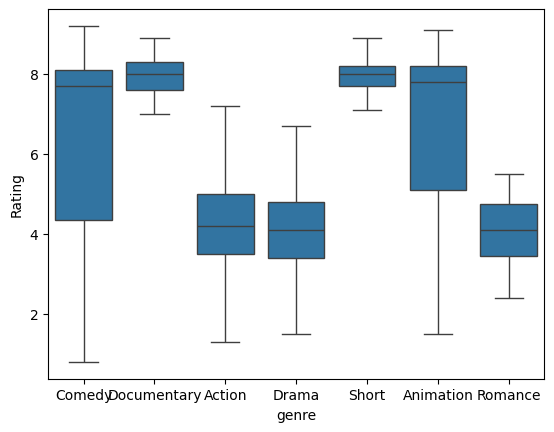

In [186]:
# Exploratory data analysis
sns.boxplot(x='genre', y='rating', data=data,showfliers=False)
plt.ylabel('Rating')
plt.xlabel('genre')
plt.show()

fig1=px.scatter_3d(data,x="genre",y="votes",z="rating")
fig1.show()

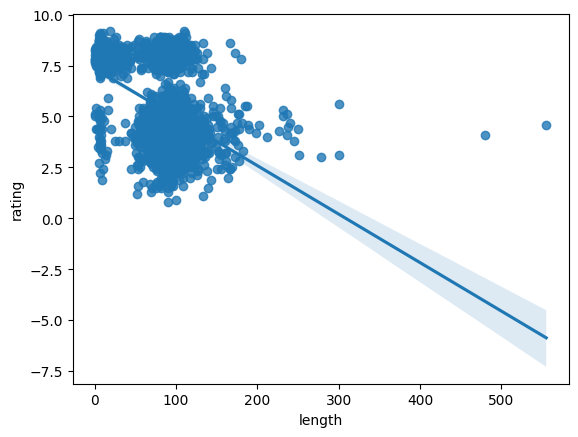

In [187]:
sns.regplot(x="length",y="rating",data=data,fit_reg=True)
plt.show()

In [194]:
#Data processing
data= pd.DataFrame(data)
mean_length = data['length'].mean()
data['length'].fillna(mean_length, inplace=True) #Use mean to fill NA values
data['rating'] = data['rating'].apply(lambda x: 1 if x >= 7 else 0)
print(data)


         year  length  budget  votes        genre  rating
film_id                                                  
45327    1984   103.0    14.4     17       Comedy       1
55943    2001    60.0    10.2     11  Documentary       1
7752     1999   105.0    13.4   3216  Documentary       1
34995    1970   135.0    11.6     73       Comedy       1
21585    1939   117.0    17.0   1988       Action       1
...       ...     ...     ...    ...          ...     ...
18066    2004     5.0    12.5      6       Comedy       1
57534    1949    84.0     8.6     84        Drama       0
33440    1990    94.0    14.8     18       Action       0
4305     1968   106.0    13.4    598       Action       0
39402    2000    84.0    12.1     37       Comedy       1

[3001 rows x 6 columns]


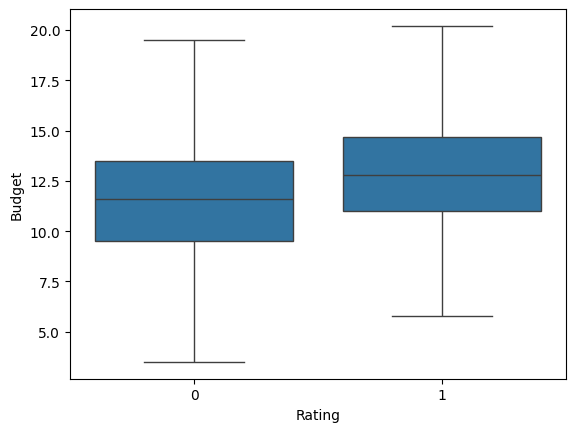

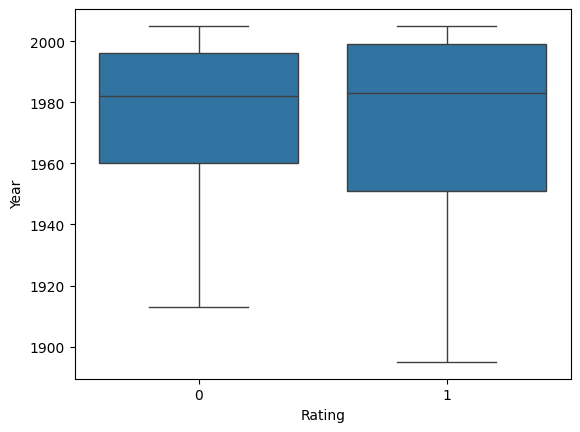

In [196]:
sns.boxplot(x='rating', y='budget', data=data,showfliers=False)
plt.xlabel('Rating')
plt.ylabel('Budget')
plt.show()
sns.boxplot(x='rating', y='year', data=data,showfliers=False)
plt.xlabel('Rating')
plt.ylabel('Year')
plt.show()

In [179]:
#total GLM
data_encoded = pd.get_dummies(data, columns=['genre'])
data_encoded = sm.add_constant(data_encoded)

X = data_encoded[['year', 'length', 'budget', 'votes']+ list(data_encoded.filter(like='genre_').columns)]
y = data_encoded['rating']

model = sm.GLM(y, X, family=sm.families.Binomial())
results = model.fit()

print(results.summary())
print("AIC:", results.aic)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 rating   No. Observations:                 3001
Model:                            GLM   Df Residuals:                     2990
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -766.64
Date:                Mon, 11 Mar 2024   Deviance:                       1533.3
Time:                        18:08:38   Pearson chi2:                 2.39e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5430
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
year                  0.0047      0.00

          genre  rating  count  percentage
0        Action       0    754   25.124958
1        Action       1    112    3.732089
2     Animation       0     54    1.799400
3     Animation       1    134    4.465178
4        Comedy       0    276    9.196934
5        Comedy       1    455   15.161613
6   Documentary       0     21    0.699767
7   Documentary       1    163    5.431523
8         Drama       0    820   27.324225
9         Drama       1     54    1.799400
10      Romance       0     27    0.899700
11      Romance       1      4    0.133289
12        Short       0      1    0.033322
13        Short       1    126    4.198600


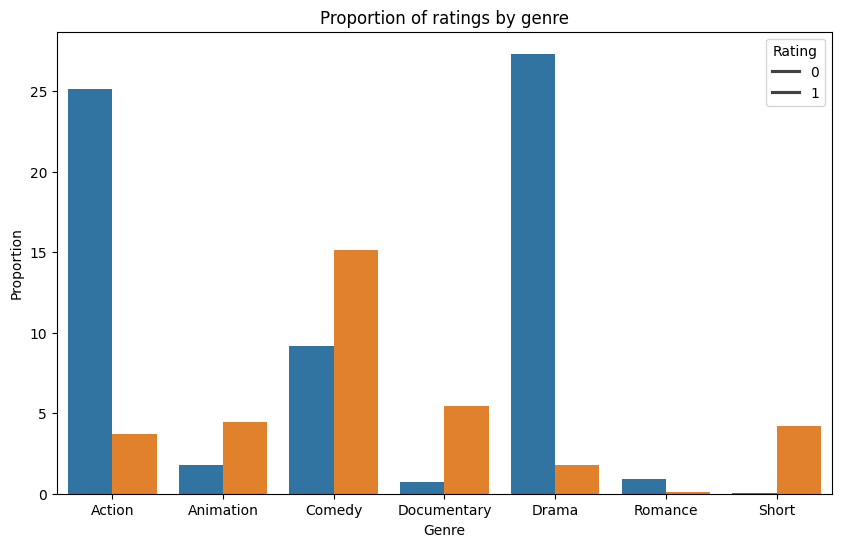

In [180]:
#categorical explanatory variable
data_gen = data.groupby(['genre', 'rating']).size().reset_index(name='count')
data_gen['percentage'] = data_gen['count'] / data_gen['count'].sum() * 100
print(data_gen)
plt.figure(figsize=(10, 6))
sns.barplot(x='genre', y='percentage', hue='rating', data=data_gen)
plt.xlabel('Genre')
plt.ylabel('Proportion')
plt.title('Proportion of ratings by genre')
plt.legend(title='Rating', labels=['0', '1'])
plt.show()

In [181]:
#Log-odds
X = data[['genre']]
y = data['rating']

X_encoded = pd.get_dummies(X, columns=['genre'])
X_encoded = sm.add_constant(X_encoded)

model = sm.GLM(y, X_encoded, family=sm.families.Binomial())
results2 = model.fit()

print(results2.summary())
print("AIC:", results2.aic)

levels = data['genre'].unique()
print(levels)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 rating   No. Observations:                 3001
Model:                            GLM   Df Residuals:                     2994
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1216.5
Date:                Mon, 11 Mar 2024   Deviance:                       2433.0
Time:                        18:08:47   Pearson chi2:                 3.00e+03
No. Iterations:                   100   Pseudo R-squ. (CS):             0.3832
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2192      0.14

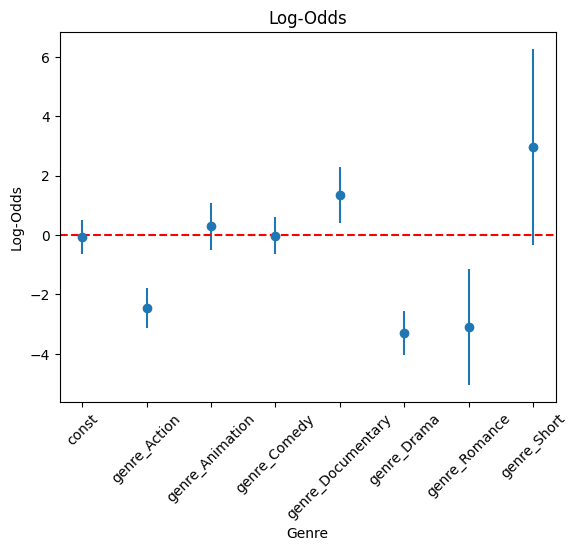

In [182]:
conf_int=results2.conf_int()
plt.errorbar(x=conf_int.index,y=conf_int[0],yerr=conf_int[1]-conf_int[0], fmt='o')
plt.xlabel('Genre')
plt.ylabel('Log-Odds')
plt.title('Log-Odds')
plt.xticks(rotation=45)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [183]:
#odds
coef_exp = np.exp(results2.params)
print("Genre Coefficients (Exponential):\n", coef_exp)


Genre Coefficients (Exponential):
 const                  1.245141
genre_Action           0.119328
genre_Animation        1.992727
genre_Comedy           1.323927
genre_Documentary      6.222725
genre_Drama            0.052915
genre_Romance          0.119162
genre_Short          100.801130
dtype: float64


         year  length  budget  votes  genre  rating
film_id                                            
45327    1984   103.0    14.4     17      2       1
55943    2001    60.0    10.2     11      3       1
7752     1999   105.0    13.4   3216      3       1
34995    1970   135.0    11.6     73      2       1
21585    1939   117.0    17.0   1988      1       1
...       ...     ...     ...    ...    ...     ...
18066    2004     5.0    12.5      6      2       1
57534    1949    84.0     8.6     84      1       0
33440    1990    94.0    14.8     18      1       0
4305     1968   106.0    13.4    598      1       0
39402    2000    84.0    12.1     37      2       1

[3001 rows x 6 columns]


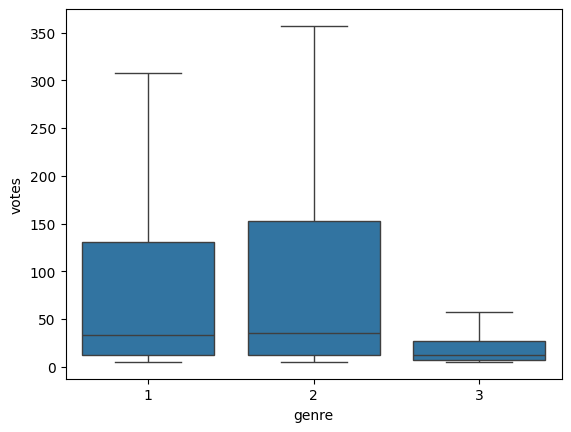

In [197]:
#hierarchical assigned scores
data['genre'] = data['genre'].replace({'Documentary': 3, 'Short': 3,'Comedy':2,'Animation':2,'Action':1,'Drama':1,'Romance':1})
print(data)
sns.boxplot(x='genre', y='votes', data=data,showfliers=False)
plt.ylabel('votes')
plt.xlabel('genre')
plt.show()


In [202]:
#numerical explanatory variable
data = pd.get_dummies(data, drop_first=True)
model = sm. GLM(data['rating'], data.drop('rating', axis=1))
result3 = model.fit()

print(result3.summary())
print("AIC:", result3.aic)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 rating   No. Observations:                 3001
Model:                            GLM   Df Residuals:                     2996
Model Family:                Gaussian   Df Model:                            4
Link Function:               Identity   Scale:                         0.10202
Method:                          IRLS   Log-Likelihood:                -830.67
Date:                Mon, 11 Mar 2024   Deviance:                       305.64
Time:                        18:17:45   Pearson chi2:                     306.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.7075
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
year          -0.0002   1.71e-05    -14.331      0.0

In [204]:
#Probabilities
print("Coefficients:")
print(result3.params)
print("\nConfidence Intervals:")
print(result3.conf_int())

probabilities = np.exp(result3.params) / (1 + np.exp(result3.params))
print("\nProbabilities:")
print(probabilities)

Coefficients:
year     -0.000245
length   -0.003329
budget    0.043226
votes     0.000002
genre     0.386661
dtype: float64

Confidence Intervals:
               0         1
year   -0.000278 -0.000211
length -0.003659 -0.002999
budget  0.039373  0.047080
votes  -0.000001  0.000005
genre   0.368049  0.405272

Probabilities:
year      0.499939
length    0.499168
budget    0.510805
votes     0.500000
genre     0.595479
dtype: float64
